In [2]:
import re
import pandas as pd
import numpy as np
import json
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from collections import Counter


## NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')



## Sklearn
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score

## Spacy
!pip install spacy && python -m spacy download en
import spacy

## GenSim
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.

## Regular Expressions

In [52]:
str_val = 'Let us try some NLP '\
            'all together during this last session. '\
            'The exercises will not be so difficult '\
            'and the end is near for us which makes it fun!' \
            'The question will we be successful? '\
            'And will there be 1 student who dares to ask questions?' \
            'This student would be very brave.'

In [53]:
val1 = re.split('\.', str_val)
print(val1)

['Let us try some NLP all together during this last session', ' The exercises will not be so difficult and the end is near for us which makes it fun!The question will we be successful? And will there be 1 student who dares to ask questions?This student would be very brave', '']


In [54]:
val2 = re.findall('[A-Z]', str_val)
print(val2)
val3 = re.findall('(\d+|\w+)', str_val)
print(val3)

['L', 'N', 'L', 'P', 'T', 'T', 'A', 'T']
['Let', 'us', 'try', 'some', 'NLP', 'all', 'together', 'during', 'this', 'last', 'session', 'The', 'exercises', 'will', 'not', 'be', 'so', 'difficult', 'and', 'the', 'end', 'is', 'near', 'for', 'us', 'which', 'makes', 'it', 'fun', 'The', 'question', 'will', 'we', 'be', 'successful', 'And', 'will', 'there', 'be', '1', 'student', 'who', 'dares', 'to', 'ask', 'questions', 'This', 'student', 'would', 'be', 'very', 'brave']


In [55]:
val4 = re.search('\d', str_val)
print(val4)
print(val4.start(), val4.end())

<_sre.SRE_Match object; span=(198, 199), match='1'>
198 199


In [36]:
val5 = re.match('[A-Z]', str_val)
print(val5)

<_sre.SRE_Match object; span=(0, 1), match='L'>


## Tokenization

NLTK Tokenization
https://www.nltk.org/api/nltk.tokenize.html

In [56]:
sent_tokenize(str_val)

['Let us try some NLP all together during this last session.',
 'The exercises will not be so difficult and the end is near for us which makes it fun!The question will we be successful?',
 'And will there be 1 student who dares to ask questions?This student would be very brave.']

In [57]:
regexp_tokenize(str_val, '[a-z]*')

['',
 'et',
 '',
 'us',
 '',
 'try',
 '',
 'some',
 '',
 '',
 '',
 '',
 '',
 'all',
 '',
 'together',
 '',
 'during',
 '',
 'this',
 '',
 'last',
 '',
 'session',
 '',
 '',
 '',
 'he',
 '',
 'exercises',
 '',
 'will',
 '',
 'not',
 '',
 'be',
 '',
 'so',
 '',
 'difficult',
 '',
 'and',
 '',
 'the',
 '',
 'end',
 '',
 'is',
 '',
 'near',
 '',
 'for',
 '',
 'us',
 '',
 'which',
 '',
 'makes',
 '',
 'it',
 '',
 'fun',
 '',
 '',
 'he',
 '',
 'question',
 '',
 'will',
 '',
 'we',
 '',
 'be',
 '',
 'successful',
 '',
 '',
 '',
 'nd',
 '',
 'will',
 '',
 'there',
 '',
 'be',
 '',
 '',
 '',
 'student',
 '',
 'who',
 '',
 'dares',
 '',
 'to',
 '',
 'ask',
 '',
 'questions',
 '',
 '',
 'his',
 '',
 'student',
 '',
 'would',
 '',
 'be',
 '',
 'very',
 '',
 'brave',
 '',
 '']

In [58]:
word_tokenize(str_val)

['Let',
 'us',
 'try',
 'some',
 'NLP',
 'all',
 'together',
 'during',
 'this',
 'last',
 'session',
 '.',
 'The',
 'exercises',
 'will',
 'not',
 'be',
 'so',
 'difficult',
 'and',
 'the',
 'end',
 'is',
 'near',
 'for',
 'us',
 'which',
 'makes',
 'it',
 'fun',
 '!',
 'The',
 'question',
 'will',
 'we',
 'be',
 'successful',
 '?',
 'And',
 'will',
 'there',
 'be',
 '1',
 'student',
 'who',
 'dares',
 'to',
 'ask',
 'questions',
 '?',
 'This',
 'student',
 'would',
 'be',
 'very',
 'brave',
 '.']

In [59]:
tknzr = TweetTokenizer()
tweet = "@cmiddag: This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"

tknzr.tokenize(tweet)

['@cmiddag',
 ':',
 'This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

In [60]:
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
tknzr.tokenize(tweet)

[':',
 'This',
 'is',
 'a',
 'coool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

In [61]:
regexp_tokenize(tweet, "([@#]\w+)")

['@cmiddag', '#dummysmiley']

## Charting

['Let', 'us', 'try', 'some', 'NLP', 'all', 'together', 'during', 'this', 'last', 'session', '.', 'The', 'exercises', 'will', 'not', 'be', 'so', 'difficult', 'and', 'the', 'end', 'is', 'near', 'for', 'us', 'which', 'makes', 'it', 'fun', '!', 'The', 'question', 'will', 'we', 'be', 'successful', '?', 'And', 'will', 'there', 'be', '1', 'student', 'who', 'dares', 'to', 'ask', 'questions', '?', 'This', 'student', 'would', 'be', 'very', 'brave', '.']
[3, 2, 3, 4, 3, 3, 8, 6, 4, 4, 7, 1, 3, 9, 4, 3, 2, 2, 9, 3, 3, 3, 2, 4, 3, 2, 5, 5, 2, 3, 1, 3, 8, 4, 2, 2, 10, 1, 3, 4, 5, 2, 1, 7, 3, 5, 2, 3, 9, 1, 4, 7, 5, 2, 4, 5, 1]


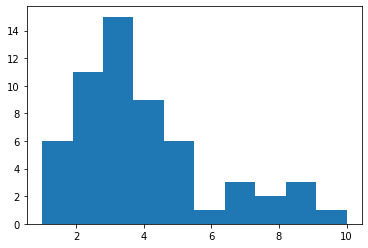

In [62]:
words = word_tokenize(str_val)

print(words)

word_lengths = [len(w) for w in words]

print(word_lengths)

plt.hist(word_lengths)

plt.show()

In [63]:
## Bag-of-words

In [64]:
str_val2 = """The cat is in the box. The cat likes the box. The box is over the cat."""

counter = Counter(word_tokenize(str_val2))
print(counter)

counter.most_common(5)

Counter({'The': 3, 'cat': 3, 'the': 3, 'box': 3, '.': 3, 'is': 2, 'in': 1, 'likes': 1, 'over': 1})


[('The', 3), ('cat', 3), ('the', 3), ('box', 3), ('.', 3)]

## Preprocessing

In [65]:
tokens = [w for w in word_tokenize(str_val.lower())
         if w.isalpha()]

print(tokens)
print(stopwords.words('english'))
no_stops = [t for t in tokens
           if t not in stopwords.words('english')]

print(no_stops)

Counter(no_stops).most_common(2)

['let', 'us', 'try', 'some', 'nlp', 'all', 'together', 'during', 'this', 'last', 'session', 'the', 'exercises', 'will', 'not', 'be', 'so', 'difficult', 'and', 'the', 'end', 'is', 'near', 'for', 'us', 'which', 'makes', 'it', 'fun', 'the', 'question', 'will', 'we', 'be', 'successful', 'and', 'will', 'there', 'be', 'student', 'who', 'dares', 'to', 'ask', 'questions', 'this', 'student', 'would', 'be', 'very', 'brave']
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of

[('us', 2), ('student', 2)]

In [66]:


tokens = [w for w in word_tokenize(str_val.lower()) if w.isalpha()]
print(tokens)

['let', 'us', 'try', 'some', 'nlp', 'all', 'together', 'during', 'this', 'last', 'session', 'the', 'exercises', 'will', 'not', 'be', 'so', 'difficult', 'and', 'the', 'end', 'is', 'near', 'for', 'us', 'which', 'makes', 'it', 'fun', 'the', 'question', 'will', 'we', 'be', 'successful', 'and', 'will', 'there', 'be', 'student', 'who', 'dares', 'to', 'ask', 'questions', 'this', 'student', 'would', 'be', 'very', 'brave']


In [67]:
no_stops = [t for t in tokens if t not in stopwords.words('english')]
print(no_stops)

['let', 'us', 'try', 'nlp', 'together', 'last', 'session', 'exercises', 'difficult', 'end', 'near', 'us', 'makes', 'fun', 'question', 'successful', 'student', 'dares', 'ask', 'questions', 'student', 'would', 'brave']


In [68]:
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

print(lemmatized)

['let', 'u', 'try', 'nlp', 'together', 'last', 'session', 'exercise', 'difficult', 'end', 'near', 'u', 'make', 'fun', 'question', 'successful', 'student', 'dare', 'ask', 'question', 'student', 'would', 'brave']


In [69]:
Counter(lemmatized)
Counter(lemmatized).most_common(5)

[('u', 2), ('question', 2), ('student', 2), ('let', 1), ('try', 1)]

## GenSim

In [70]:
my_documents = ['The movie was about a spaceship and aliens.',
    'I really liked the movie!',
    'Awesome action scenes, but boring characters.',
    'The movie was awful! I hate alien films.',
    'Space is cool! I liked the movie.',
    'More space films, please!']

tokenized_docs = [word_tokenize(doc.lower())
                 for doc in my_documents]

dictionary = Dictionary(tokenized_docs)

In [71]:
dictionary.token2id

{'!': 9,
 ',': 13,
 '.': 0,
 'a': 1,
 'about': 2,
 'action': 14,
 'alien': 20,
 'aliens': 3,
 'and': 4,
 'awesome': 15,
 'awful': 21,
 'boring': 16,
 'but': 17,
 'characters': 18,
 'cool': 24,
 'films': 22,
 'hate': 23,
 'i': 10,
 'is': 25,
 'liked': 11,
 'more': 27,
 'movie': 5,
 'please': 28,
 'really': 12,
 'scenes': 19,
 'space': 26,
 'spaceship': 6,
 'the': 7,
 'was': 8}

In [72]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

In [73]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(0, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)],
 [(0, 1),
  (5, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)],
 [(0, 1), (5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (24, 1), (25, 1), (26, 1)],
 [(9, 1), (13, 1), (22, 1), (26, 1), (27, 1), (28, 1)]]

## TF-IDF

In [74]:
tfidf = TfidfModel(corpus)

In [75]:
tfidf[corpus[3]]

[(0, 0.11167183378630395),
 (5, 0.11167183378630395),
 (7, 0.11167183378630395),
 (8, 0.30257609456991347),
 (9, 0.11167183378630395),
 (10, 0.19090426078360948),
 (20, 0.4934803553535229),
 (21, 0.4934803553535229),
 (22, 0.30257609456991347),
 (23, 0.4934803553535229)]

## Named Entity Recognition

In [76]:
sentence = '''In New York, I like to ride the Metro to visit MOMA 
                      and some restaurants rated well by Ruth Reichl.'''

tokenized_sent = nltk.word_tokenize(sentence)

In [77]:
tagged_sent = nltk.pos_tag(tokenized_sent)
print(tagged_sent)

[('In', 'IN'), ('New', 'NNP'), ('York', 'NNP'), (',', ','), ('I', 'PRP'), ('like', 'VBP'), ('to', 'TO'), ('ride', 'VB'), ('the', 'DT'), ('Metro', 'NNP'), ('to', 'TO'), ('visit', 'VB'), ('MOMA', 'NNP'), ('and', 'CC'), ('some', 'DT'), ('restaurants', 'NNS'), ('rated', 'VBN'), ('well', 'RB'), ('by', 'IN'), ('Ruth', 'NNP'), ('Reichl', 'NNP'), ('.', '.')]


 - CC coordinating conjunction
 - CD cardinal digit
 - DT determiner
 - EX existential there (like: "there is" ... think of it like "there exists")
 - FW foreign word
 - IN preposition/subordinating conjunction
 - JJ adjective 'big'
 - JJR adjective, comparative 'bigger'
 - JJS adjective, superlative 'biggest'
 - LS list marker 1)
 - MD modal could, will
 - NN noun, singular 'desk'
 - NNS noun plural 'desks'
 - NNP proper noun, singular 'Harrison'
 - NNPS proper noun, plural 'Americans'
 - PDT predeterminer 'all the kids'
 - POS possessive ending parent's
 - PRP personal pronoun I, he, she
 - PRP\$ possessive pronoun my, his, hers
 - RB adverb very, silently,
 - RBR adverb, comparative better
 - RBS adverb, superlative best
 - RP particle give up
 - TO to go 'to' the store.
 - UH interjection errrrrrrrm
 - VB verb, base form take
 - VBD verb, past tense took
 - VBG verb, gerund/present participle taking
 - VBN verb, past participle taken
 - VBP verb, sing. present, non-3d take
 - VBZ verb, 3rd person sing. present takes
 - WDT wh-determiner which
 - WP wh-pronoun who, what
 - WP\$ possessive wh-pronoun whose
 - WRB wh-abverb where, when

In [78]:
print(nltk.ne_chunk(tagged_sent))

(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


## Spacy

In [79]:
nlp = spacy.load('en')

nlp.entity

doc = nlp("""Berlin is the capital of Germany; 
                  and the residence of Chancellor Angela Merkel.""")
print(doc)

print(doc.ents[0], doc.ents[0].label_)

Berlin is the capital of Germany; 
                  and the residence of Chancellor Angela Merkel.
Berlin GPE


## IMDB

In [80]:
%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [81]:
meta = pd.read_csv("movie.metadata.tsv", sep = '\t', header = None)
# rename columns
meta.columns = ["movie_id",1,"movie_name",3,4,5,6,7,"genre"]

meta.head()

plots = []

with open("plot_summaries.txt", 'r') as f:
       reader = csv.reader(f, dialect='excel-tab') 
       for row in tqdm(reader):
            plots.append(row)
            

movie_id = []
plot = []

# extract movie Ids and plot summaries
for i in tqdm(plots):
  movie_id.append(i[0])
  plot.append(i[1])

# create dataframe
movies = pd.DataFrame({'movie_id': movie_id, 'plot': plot})

9787it [00:00, 13281.41it/s]
100%|██████████| 9787/9787 [00:00<00:00, 779700.15it/s]


In [82]:
movie_id = []
plot = []

# extract movie Ids and plot summaries
for i in tqdm(plots):
  movie_id.append(i[0])
  plot.append(i[1])

# create dataframe
movies = pd.DataFrame({'movie_id': movie_id, 'plot': plot})

movies.head()

100%|██████████| 9787/9787 [00:00<00:00, 802189.74it/s]


,movie_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all."
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole..."
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e..."
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo..."
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r..."


In [83]:
# change datatype of 'movie_id'
meta['movie_id'] = meta['movie_id'].astype(str)

# merge meta with movies
movies = pd.merge(movies, meta[['movie_id', 'movie_name', 'genre']], on = 'movie_id')

movies.head()

,movie_id,plot,movie_name,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World cinema""}"
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...",The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}"
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e...",Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama"", ""/m/01chg"": ""Bollywood""}"
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""Comedy""}"
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...",A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama"", ""/m/01f9r0"": ""Docudrama"", ""/m/03q4nz"": ""World cinema"", ""/m/05bh16v"": ""Courtroom Drama""}"


In [84]:
movies['genre'][0]

type(json.loads(movies['genre'][0]))

json.loads(movies['genre'][0]).values()

dict_values(['Drama', 'World cinema'])

In [86]:
# an empty list
genres = [] 

# extract genres
for i in movies['genre']: 
  genres.append(list(json.loads(i).values())) 

# add to 'movies' dataframe  
movies['genre_new'] = genres

print(genres)

[['Drama', 'World cinema'], ['Action/Adventure', 'Science Fiction', 'Action', 'Drama'], ['Musical', 'Action', 'Drama', 'Bollywood'], ['Screwball comedy', 'Comedy'], ['Crime Fiction', 'Drama', 'Docudrama', 'World cinema', 'Courtroom Drama'], ['Thriller', 'Action/Adventure', 'Action', 'Drama'], ['Thriller', 'Drama', 'Horror'], ['Drama', 'Teen'], ['Romantic comedy', 'Media Satire', 'Americana', 'Comedy-drama', 'Black-and-white', 'Drama', 'Comedy', 'Romance Film'], ['Short Film', 'Family Film', 'Animation'], ['Comedy'], ['Crime Fiction', 'Drama', 'Comedy', 'World cinema'], ['Parody', 'Comedy'], ['War film', 'Epic', 'Action/Adventure', 'Period piece', 'Drama', 'Film adaptation', 'Action', 'Political drama'], ['Cult', 'Coming of age', 'Comedy', 'Teen'], ['Horror'], ['Thriller', 'Mystery', 'Comedy film', 'Crime Fiction', 'Horror'], ['Drama'], ['Thriller', 'Crime Fiction', 'Indie', 'Martial Arts Film', 'Romance Film', 'Action'], ['Period piece', 'Drama', 'Indie'], ['Drama', 'War film'], ['Comp

In [87]:
# remove samples with 0 genre tags
movies_new = movies[~(movies['genre_new'].str.len() == 0)]

In [88]:
movies_new

,movie_id,plot,movie_name,genre,genre_new
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World cinema""}","[Drama, World cinema]"
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...",The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}","[Action/Adventure, Science Fiction, Action, Drama]"
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e...",Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama"", ""/m/01chg"": ""Bollywood""}","[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""Comedy""}","[Screwball comedy, Comedy]"
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...",A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama"", ""/m/01f9r0"": ""Docudrama"", ""/m/03q4nz"": ""World cinema"", ""/m/05bh16v"": ""Courtroom Drama""}","[Crime Fiction, Drama, Docudrama, World cinema, Courtroom Drama]"
...,...,...,...,...,...
9759,21908706,"A group of ex-resistance fighters are brought together by Marie-Octobre, the code name of Marie-Helene Dumoulin . The former members of the network have carried on with their lives after the war, but this evening they are going to have to live again a fateful night – the night their leader was k...",Marie-Octobre,"{""/m/07s9rl0"": ""Drama""}",[Drama]
9760,8703922,"Set in the small town of Paloh, Johor, during the final days of the Japanese occupation in 1944, the movie is about the confrontation between the Japanese occupying force and the Communist Party of Malaya. In order to survive, four friends - Ahmad, Osman, Puteh and Harun choose to serve the Japa...",Paloh,"{""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama"", ""/m/02p0szs"": ""Historical fiction""}","[Action, Drama, Historical fiction]"
9761,16395026,"A brash American actor, Robin Grange, goes to London to feature in a major new play. The playwright of the production, Felix Webb, is having an intense affair with the leading lady, Hilary Rule. His wife of fourteen years, Eleanor, suspects that her husband is cheating and cannot suppress her ra...",The Leading Man,"{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""Romance Film"", ""/m/01z4y"": ""Comedy""}","[Romantic comedy, Romance Film, Comedy]"
9762,258732,"Immensely popular Democratic President Andrew Shepherd is preparing to run for re-election. The President and his staff, led by Chief of Staff A.J. MacInerney , attempt to consolidate the administration's 63% approval rating by passing a moderate crime control bill. However, support for the bil...",The American President,"{""/m/06cvj"": ""Romantic comedy"", ""/m/07

In [89]:
# get all genre tags in a list
all_genres = sum(genres,[])
len(set(all_genres))

317

In [90]:
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

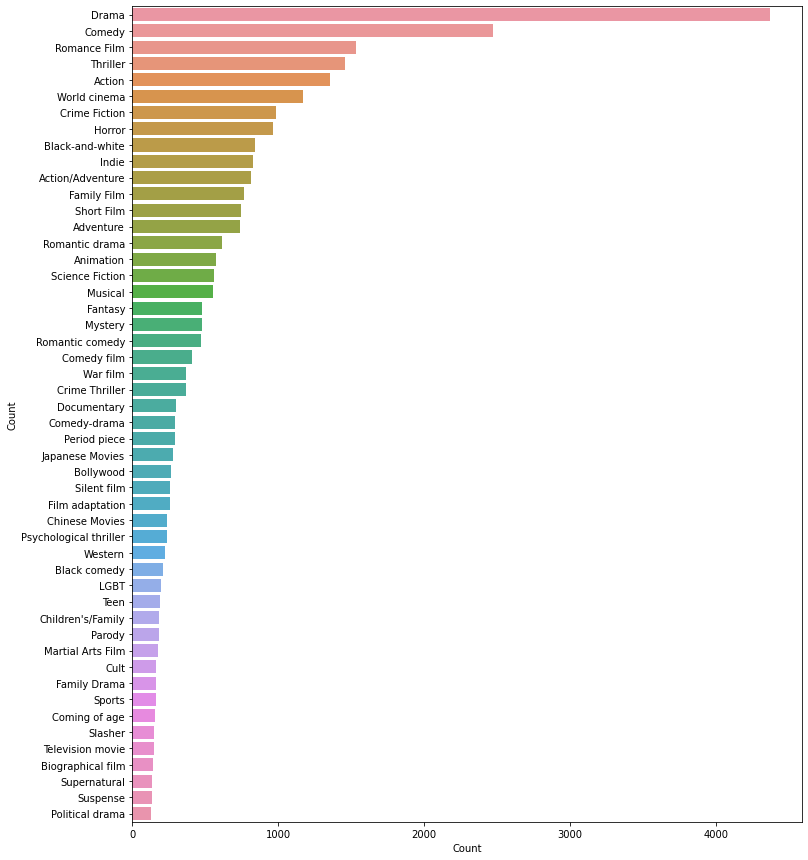

In [91]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [92]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [121]:
movies_new['clean_plot'] = movies_new['plot'].apply(lambda x: clean_text(x))
print(movies_new['clean_plot'])

0                                                                                                                                       shlykov a hard working taxi driver and lyosha a saxophonist develop a bizarre love hate relationship and despite their prejudices realize they arent so different after all
1       the nation of panem consists of a wealthy capitol and twelve poorer districts as punishment for a past rebellion each district must provide a boy and girl between the ages of and selected by lottery for the annual hunger games the tributes must fight to the death in an arena the sole survivor is...
2       poovalli induchoodan is sentenced for six years prison life for murdering his classmate induchoodan the only son of justice maranchery karunakara menon was framed in the case by manapally madhavan nambiar and his crony dysp sankaranarayanan to take revenge on idealist judge menon who had earlier...
3       the lemon drop kid a new york city swindler is illegally touting hor

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


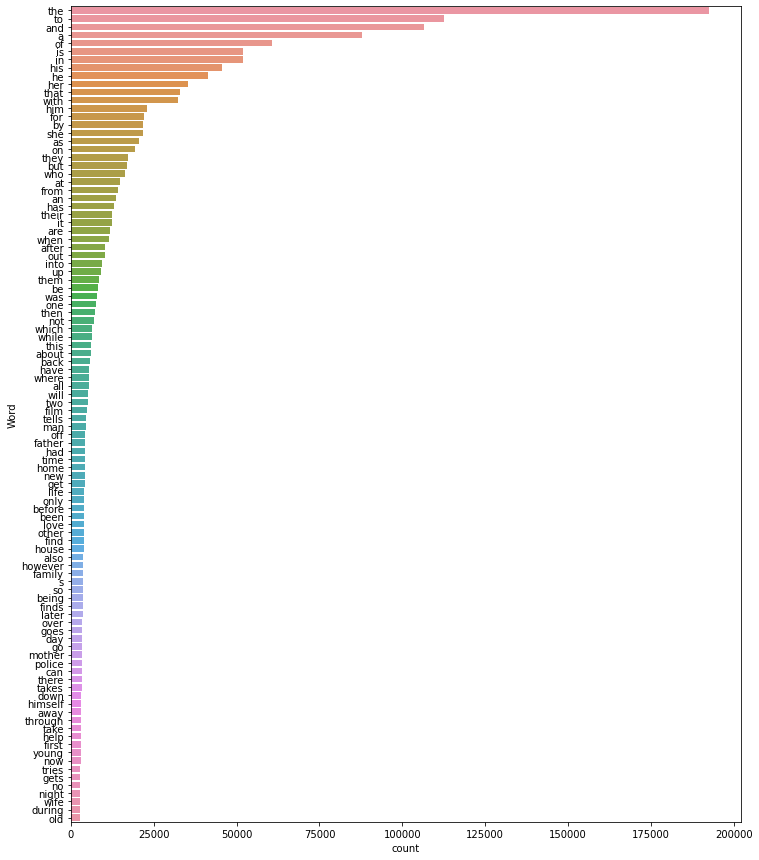

In [112]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(movies_new['clean_plot'], 100)

In [113]:
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

movies_new['clean_plot'] = movies_new['clean_plot'].apply(lambda x: remove_stopwords(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


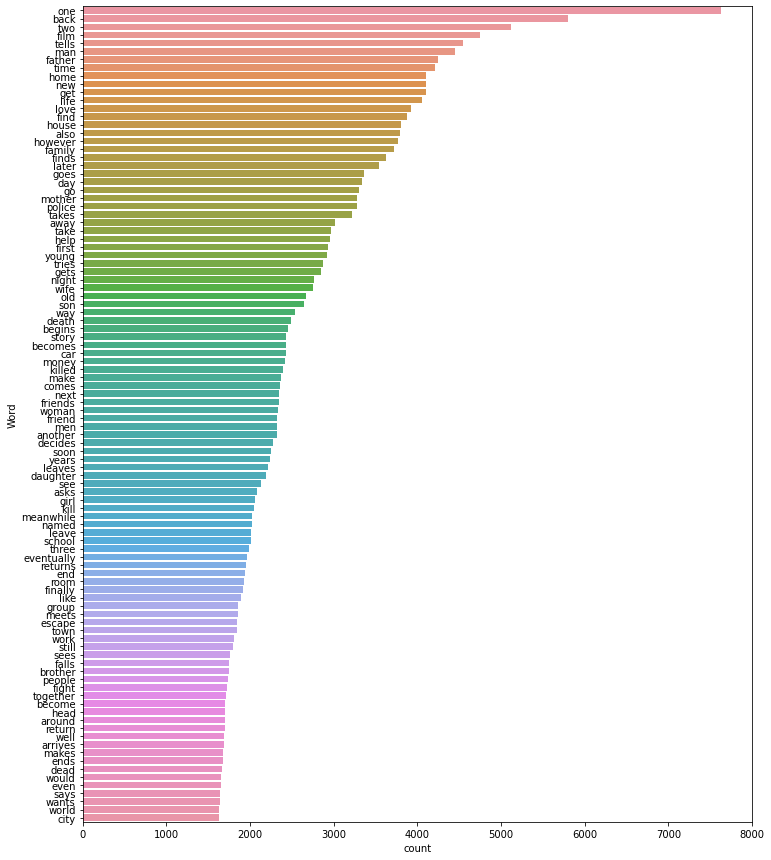

In [96]:
freq_words(movies_new['clean_plot'], 100)

In [129]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies_new['genre_new'])

# transform target variable
y = multilabel_binarizer.transform(movies_new['genre_new'])
print(y)

[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [98]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [130]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(movies_new['clean_plot'], y, test_size=0.2, random_state=1)

In [131]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

print(xtrain_tfidf)
print(ytrain)



  (0, 9421)	0.02039880173594075
  (0, 7347)	0.021010800241877715
  (0, 9759)	0.02370468005386592
  (0, 2207)	0.02584711507868685
  (0, 1018)	0.021636443591203154
  (0, 3348)	0.010654228250577604
  (0, 7486)	0.01955352176918309
  (0, 9280)	0.018181312601150662
  (0, 7856)	0.014449156794959887
  (0, 9679)	0.009015093258050968
  (0, 8528)	0.017227533862318734
  (0, 8991)	0.027394166180238655
  (0, 5066)	0.029974162840073783
  (0, 9334)	0.013566855430350563
  (0, 2669)	0.011227993958380634
  (0, 2485)	0.015344953676787934
  (0, 2131)	0.02285357484587777
  (0, 958)	0.01738537236341563
  (0, 3192)	0.02630520700611138
  (0, 7881)	0.022016317129868214
  (0, 5112)	0.01259681436483719
  (0, 8853)	0.015318017398299449
  (0, 8610)	0.023486691626161658
  (0, 8728)	0.03205358583227497
  (0, 173)	0.013265530684586753
  :	:
  (7729, 4642)	0.017504746322863102
  (7729, 3698)	0.02384023770033898
  (7729, 2239)	0.07644299642142825
  (7729, 6319)	0.018037416307347093
  (7729, 327)	0.030274101458615716
  (

In [132]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [133]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 42 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 47 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 51 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 77 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 92 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 106 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 143 is present in all trainin

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [134]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

print(y_pred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [136]:
multilabel_binarizer.inverse_transform(y_pred)[3]

()

In [137]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.2126374290201764

In [138]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.36041444756463636

In [139]:

def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [151]:
for i in range(5): 
  k = xval.sample(1).index[0] 
  print("Movie: ", movies_new['movie_name'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",movies_new['genre_new'][k], "\n")

Movie:  The Monte Carlo Story 
Predicted genre:  [()]
Actual genre:  ['Romantic comedy', 'World cinema', 'Comedy-drama', 'Drama', 'Comedy', 'Romantic drama', 'Romance Film'] 

Movie:  Jaal 
Predicted genre:  [()]
Actual genre:  ['Thriller', 'Crime Fiction', 'Action', 'Drama', 'Mystery'] 

Movie:  The Mouse and His Child 
Predicted genre:  [()]
Actual genre:  ['Japanese Movies', 'Adventure', "Children's/Family", 'Animation', 'Fantasy', "Children's Fantasy", 'Family Film'] 

Movie:  Balalaika 
Predicted genre:  [('Drama',)]
Actual genre:  ['Romance Film', 'Musical'] 

Movie:  C.I.D.Moosa 
Predicted genre:  [()]
Actual genre:  ['Malayalam Cinema', 'Action', 'Comedy'] 

